 Code for the introductory example in our paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cuqi
assert cuqi.__version__ == '0.3.0'

In [2]:
from cuqi.testproblem import Deconvolution2D
from cuqi.distribution import Gaussian, Laplace_diff, Gamma
from cuqi.problem import BayesianProblem
from cuqi.data import imresize, rgb2gray

In [11]:
# Load cookie.png from current folder.
cookie = plt.imread('cookie2.png')

# Convert to rgb.
cookie = cookie[:, :, :3]

# Convert to grayscale.
cookie = rgb2gray(cookie)

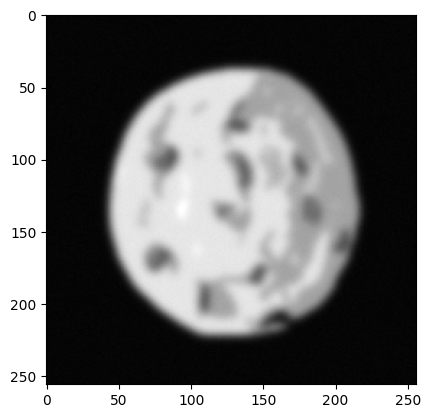

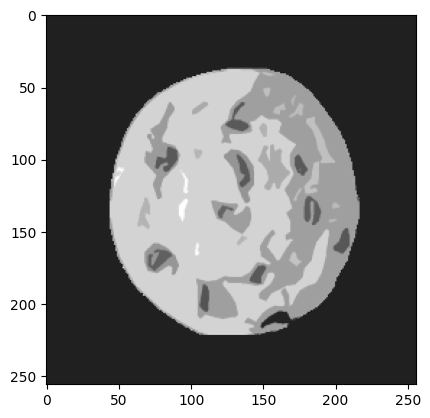

In [15]:
A, y_data, info = Deconvolution2D.get_components(dim=256, PSF_param=3, phantom=cookie)
y_data.plot(); plt.show()
info.exactSolution.plot(); plt.show()

In [16]:
d = Gamma(1, 1e-4)
x = Laplace_diff(np.zeros(A.domain_dim), lambda d: 1/d, physical_dim=2)
y = Gaussian(A @ x, 0.0036**2)

In [17]:
BP = BayesianProblem(x, y, d)
BP.set_data(y=y_data)

BayesianProblem with target: 
 JointDistribution(
    Equation: 
	p(x,d|y) ∝ p(x|d)L(x|y)p(d)
    Densities: 
	x ~ CUQI Laplace_diff. Conditioning variables ['d'].
	y ~ CUQI Gaussian Likelihood function. Parameters ['x'].
	d ~ CUQI Gamma.
)

Computing 1200 samples
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!! Automatic sampler selection is experimental. !!!
!!!    Always validate the computed results.     !!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Using Gibbs sampler
burn-in: 20%

Automatically determined sampling strategy:
	x: UnadjustedLaplaceApproximation
	d: ConjugateApprox

Warmup 240 / 240
Sample 1200 / 1200
Elapsed time: 1230.9354643821716
Plotting results


c:\Users\Nicolai\anaconda3\envs\cuqipy\lib\site-packages\cuqi\problem\_problem.py:402: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if exact is not None and key in exact:


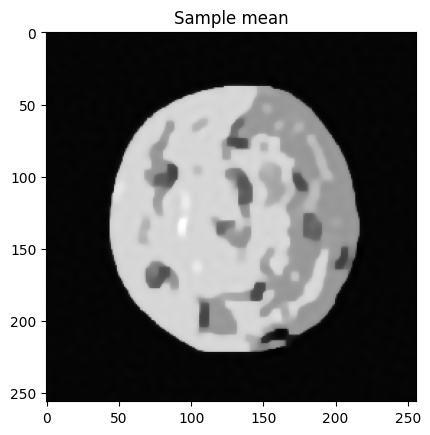

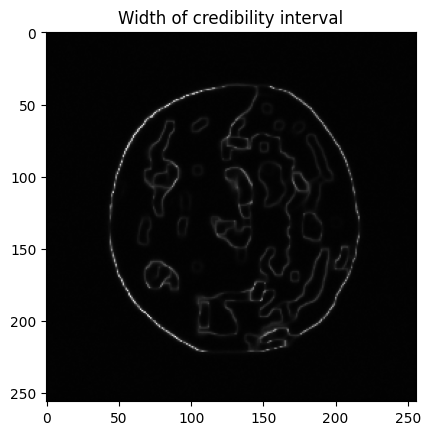

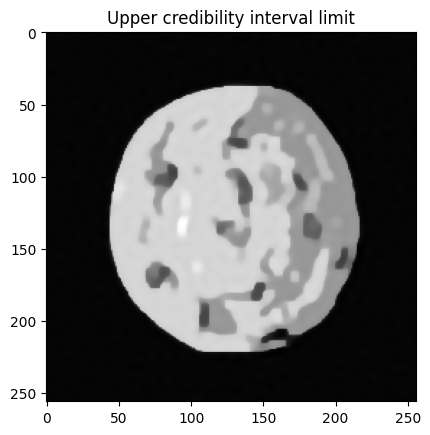

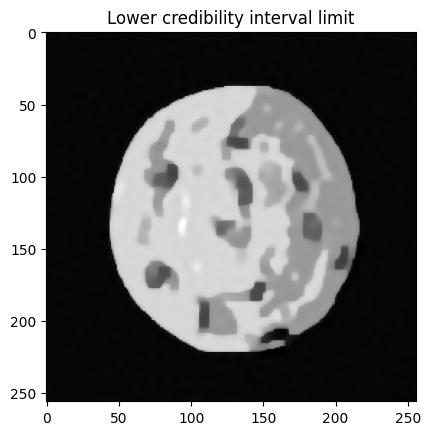

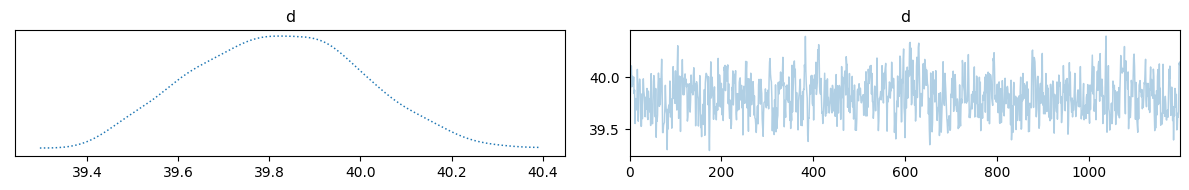

In [18]:
samples = BP.UQ(1200, exact=info.exactSolution)

Text(0.5, 1.0, 'Posterior Standard Deviation')

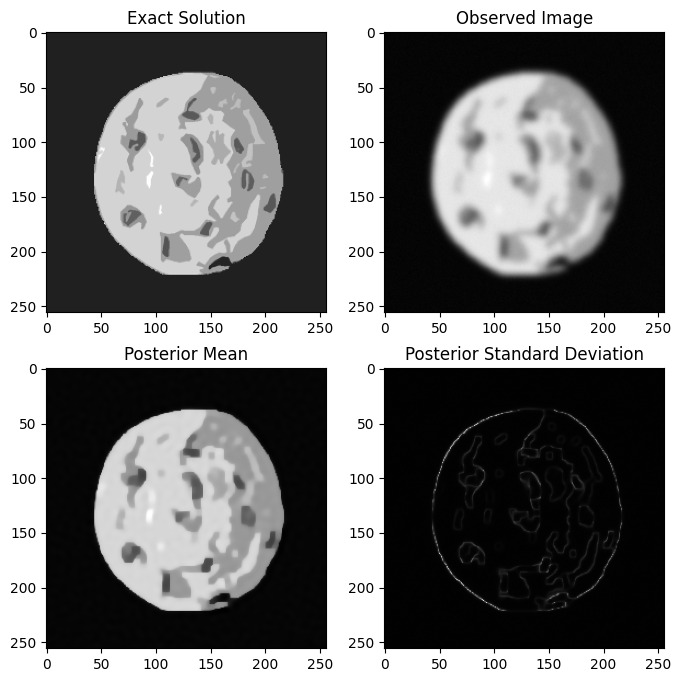

In [20]:
# Extract sample mean and variance
mean = samples["x"].mean()
var = np.sqrt(samples["x"].variance())


# Subplot mean, with data and exact solution
fig, ax = plt.subplots(2, 2, figsize=(8, 8))

ax[0][0].imshow(info.exactSolution.reshape(256, 256), cmap='gray')
ax[0][0].set_title('Exact Solution')

ax[0][1].imshow(y_data.reshape(256, 256), cmap='gray')
ax[0][1].set_title('Observed Image')

ax[1][0].imshow(mean.reshape(256, 256), cmap='gray')
ax[1][0].set_title('Posterior Mean')

ax[1][1].imshow(var.reshape(256, 256), cmap='gray')
ax[1][1].set_title('Posterior Standard Deviation')

